In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

# Importing the dataset

In [18]:
df = pd.read_csv('C:\\Nikhil\\DS\\ML\\Assignments\\Decision tree\\Fraud_check.csv')
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


# Performing data cleaning

In [19]:
# Creating a column for the person is risky or not 
def categorise(row):  
    if row['Taxable.Income'] <= 30000:
        return 'Risky'
    return 'Good'

In [20]:
df['Person'] = df.apply(lambda row: categorise(row), axis=1)
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Person
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good


In [21]:
df['Person'].value_counts()

Good     476
Risky    124
Name: Person, dtype: int64

In [22]:
# Creating dummies of all categorical features 
df = pd.get_dummies(df, columns = ['Undergrad','Marital.Status','Urban','Person'])
df.head()

,Taxable.Income,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES,Person_Good,Person_Risky
0,68833,50047,10,1,0,0,0,1,0,1,1,0
1,33700,134075,18,0,1,1,0,0,0,1,1,0
2,36925,160205,30,1,0,0,1,0,0,1,1,0
3,50190,193264,15,0,1,0,0,1,0,1,1,0
4,81002,27533,28,1,0,0,1,0,1,0,1,0


In [23]:
# # Dropping all the features which is not required
# df.drop(['Undergrad_NO','Urban_NO','Marital.Status_Divorced','Person_Good'], axis = 1, inplace = True)
# df.head()
df.drop(['Person_Good','Taxable.Income'], axis = 1, inplace = True)

In [24]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [25]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(df.iloc[:,:])
df_norm.head()

,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES,Person_Risky
0,0.139472,0.333333,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.622394,0.600000,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.772568,1.000000,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.962563,0.500000,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.010081,0.933333,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   City.Population          600 non-null    int64
 1   Work.Experience          600 non-null    int64
 2   Undergrad_NO             600 non-null    uint8
 3   Undergrad_YES            600 non-null    uint8
 4   Marital.Status_Divorced  600 non-null    uint8
 5   Marital.Status_Married   600 non-null    uint8
 6   Marital.Status_Single    600 non-null    uint8
 7   Urban_NO                 600 non-null    uint8
 8   Urban_YES                600 non-null    uint8
 9   Person_Risky             600 non-null    uint8
dtypes: int64(2), uint8(8)
memory usage: 14.2 KB


In [27]:
X = df.iloc[:,0:9]
Y = df.iloc[:,9]

In [28]:
# Dividing the data into train test split
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state = 0)

# Now building a model

In [29]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [30]:
from sklearn.metrics import accuracy_score
pred_train = model.predict(x_train)
accuracy_score(y_train,pred_train)

0.8

In [31]:
pred_test = model.predict(x_test)
accuracy_score(y_test,pred_test)

0.7833333333333333

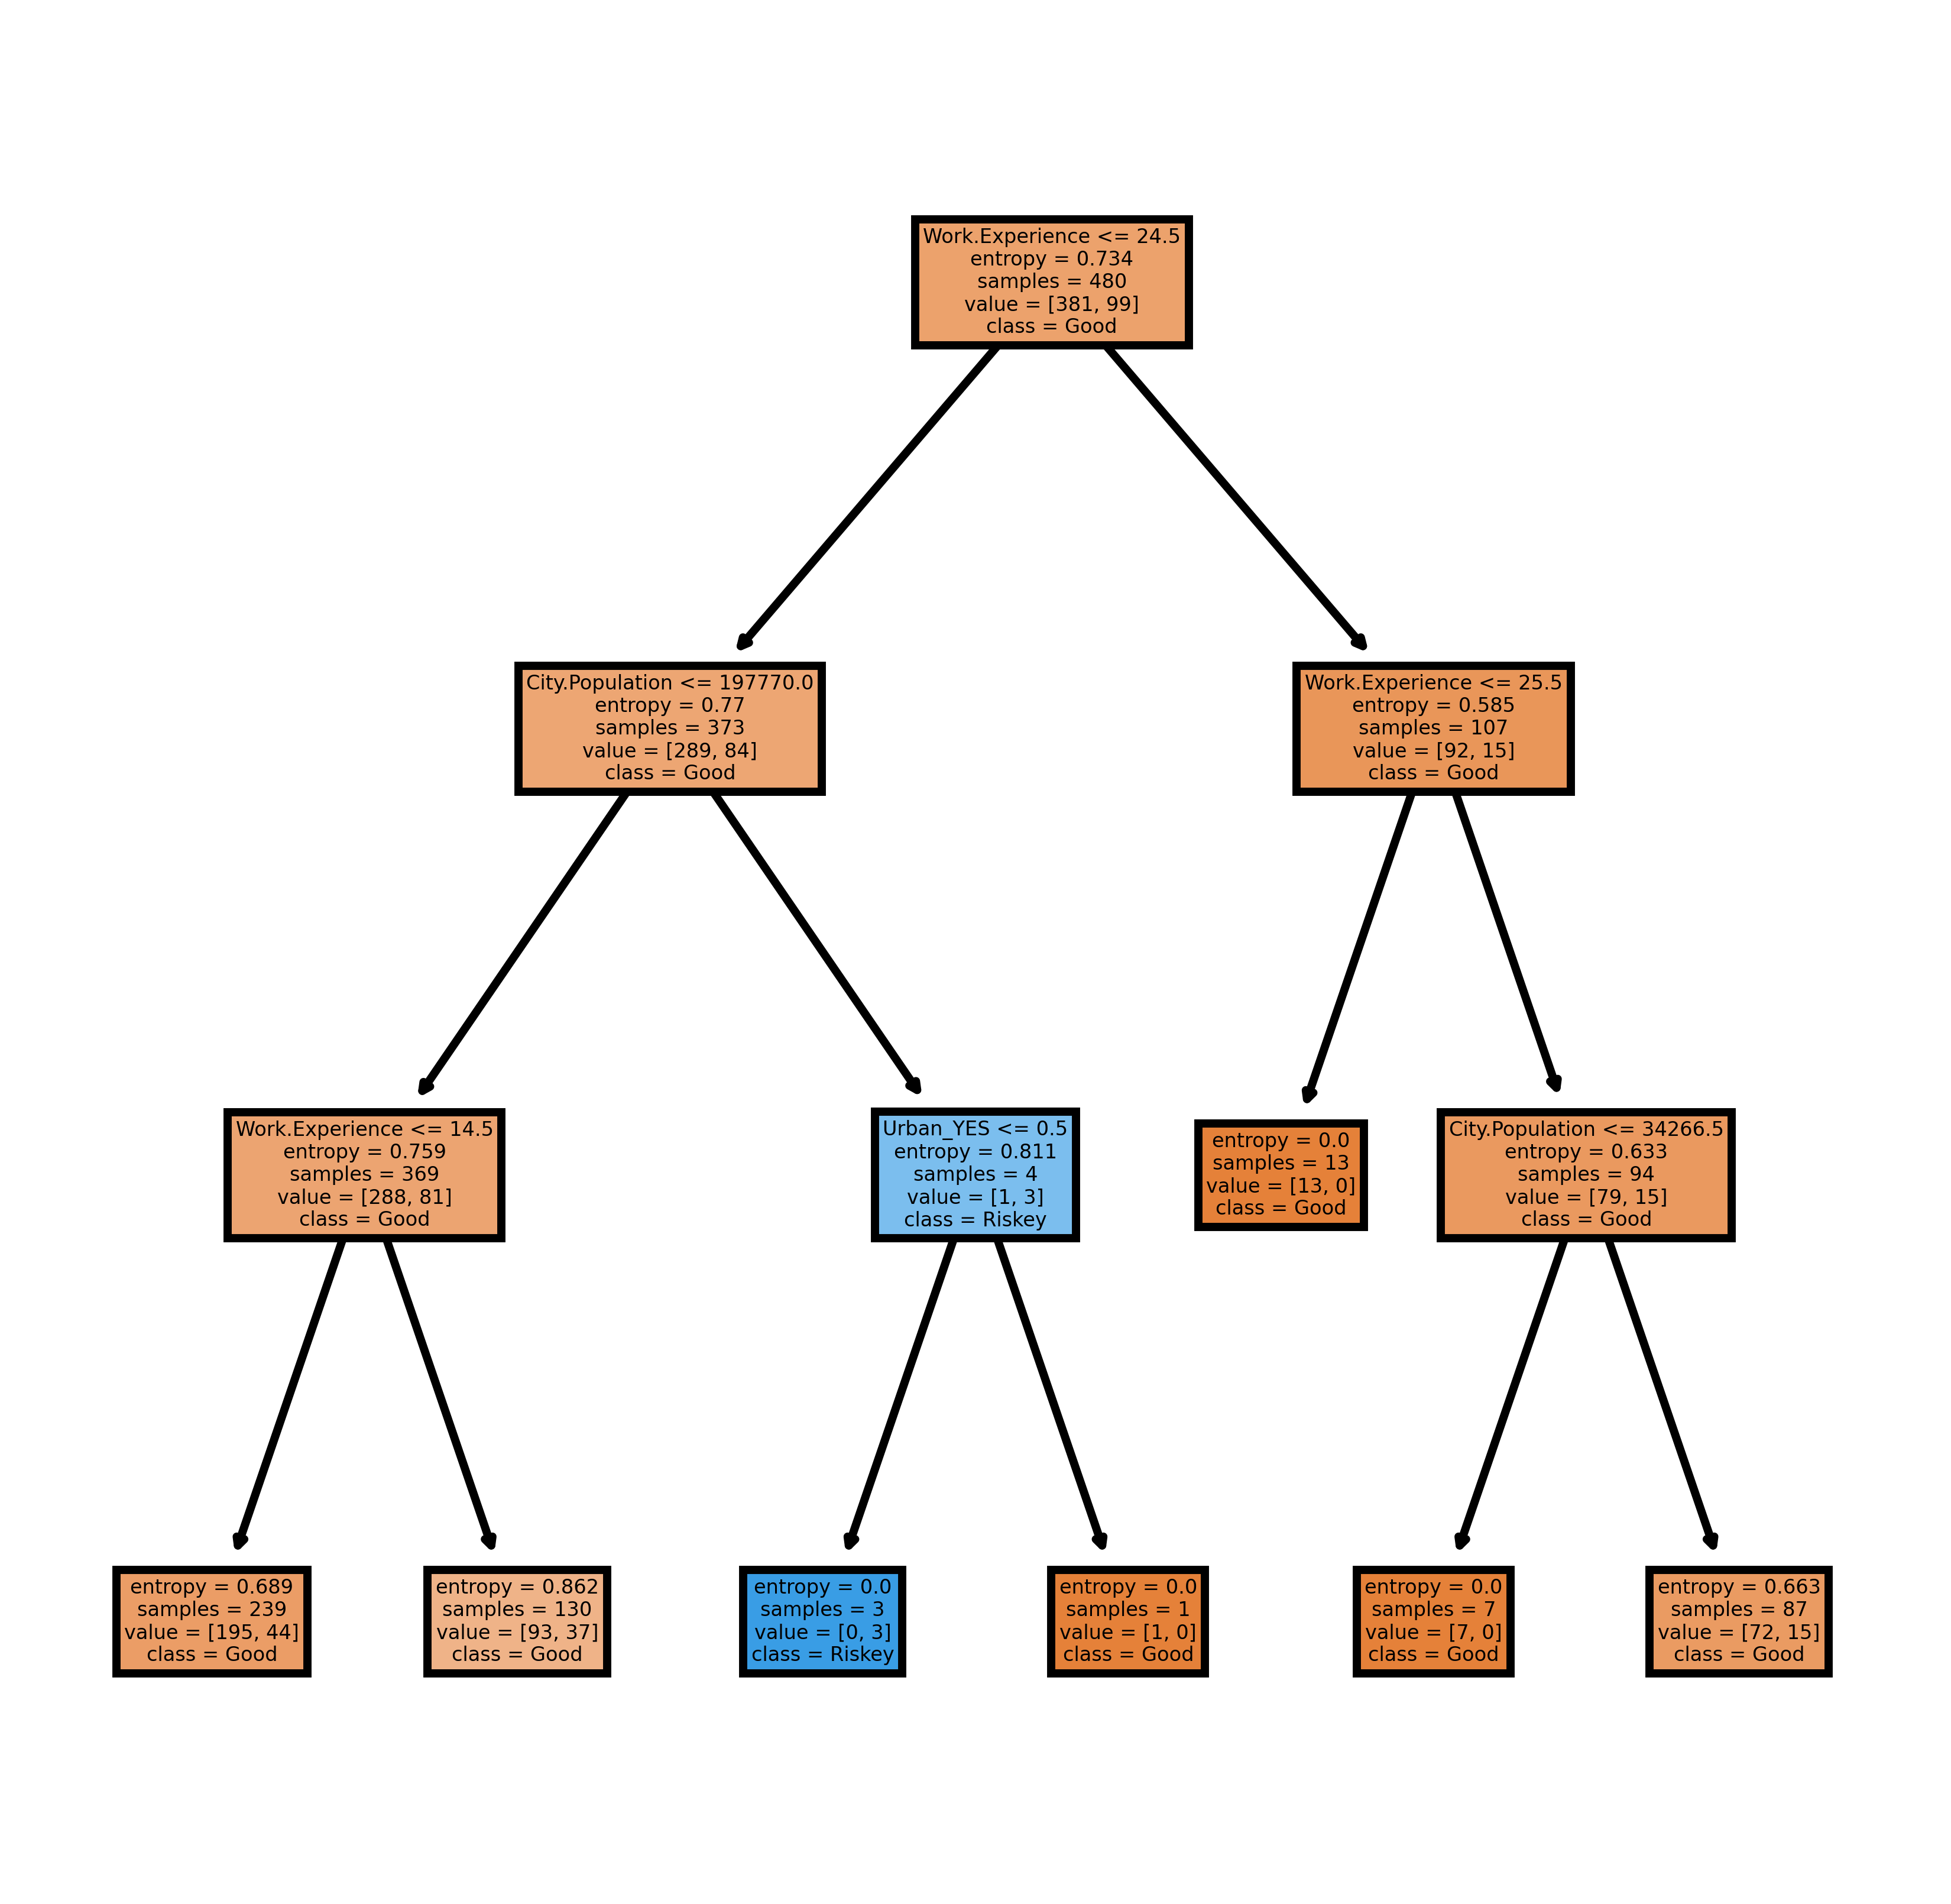

In [32]:
#PLot the decision tree
from sklearn import tree
fn=['City.Population','Work.Experience','Undergrad_NO','Undergrad_YES','Marital.Status_Divorced',
    'Marital.Status_Married','Marital.Status_Single','Urban_NO','Urban_YES'] #.columns
cn=['Good','Riskey']    #.value_count.keys
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=1000)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);